# Dataset

Presentation and exploration of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,8)
pd.options.display.max_columns = None
pd.options.display.precision = 4

In [2]:
%run eeg_learn_functions.py

In [15]:
%run utils.py

<Figure size 432x288 with 0 Axes>

# Data loading

In [4]:
df = pd.read_csv("data/ML101_KS.csv", header=None).T
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-78.03,-75.99,-88.74,-87.21,-53.04,-64.77,-69.87,-80.07,-72.42,-68.85,-77.01,-69.87,-102.00,-116.79
1,-79.56,-77.01,-92.82,-93.84,-54.57,-65.79,-82.62,-93.33,-71.91,-78.03,-76.50,-59.67,-97.41,-121.38
2,-77.52,-77.01,-92.31,-89.76,-78.54,-59.16,-76.50,-75.99,-84.66,-61.71,-80.58,-71.91,-102.00,-139.23
3,-78.54,-73.44,-87.21,-81.60,-67.83,-59.16,-74.46,-67.83,-85.17,-55.08,-83.64,-83.13,-99.96,-136.17
4,-74.46,-64.26,-81.09,-75.48,-57.63,-62.73,-75.48,-75.48,-73.44,-62.73,-84.15,-79.56,-92.31,-128.52


In [5]:
N_POINTS, N_CHANNELS = df.shape
N_POINTS, N_CHANNELS

(15104, 14)

In [6]:
SAMPLING_RATE = 128.0
N_SECONDS = N_POINTS / SAMPLING_RATE
N_SECONDS

118.0

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000,15104.0000
mean,-74.5237,-74.5262,-75.2090,-84.5480,-74.6888,-74.4620,-74.7108,-75.0444,-74.7568,-73.7301,-74.6366,-73.9806,-74.8771,-74.5024
std,22.7225,18.4686,16.2207,18.7864,21.9575,20.9349,16.1172,19.7323,11.7411,21.0242,11.2846,16.8376,13.4574,20.6445
min,-184.6200,-170.3400,-170.8500,-200.4300,-167.2800,-175.9500,-148.9200,-156.5700,-132.6000,-163.2000,-119.8500,-150.9600,-135.6600,-174.4200
25%,-89.2500,-86.1900,-85.6800,-95.8800,-89.2500,-88.2300,-85.1700,-88.2300,-81.6000,-87.7200,-81.0900,-83.6400,-82.6200,-88.2300
50%,-75.9900,-75.4800,-75.9900,-84.1500,-74.4600,-74.9700,-74.9700,-75.4800,-74.9700,-74.4600,-75.4800,-74.9700,-75.4800,-74.4600
75%,-61.2000,-62.2200,-63.7500,-73.9500,-60.1800,-60.6900,-63.7500,-61.7100,-66.3000,-59.6700,-65.2800,-62.2200,-64.7700,-60.6900
max,39.7800,10.7100,10.2000,10.7100,16.8300,51.5100,-8.6700,19.3800,-34.1700,20.4000,-25.5000,7.6500,-2.0400,11.2200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15104 entries, 0 to 15103
Data columns (total 14 columns):
0     15104 non-null float64
1     15104 non-null float64
2     15104 non-null float64
3     15104 non-null float64
4     15104 non-null float64
5     15104 non-null float64
6     15104 non-null float64
7     15104 non-null float64
8     15104 non-null float64
9     15104 non-null float64
10    15104 non-null float64
11    15104 non-null float64
12    15104 non-null float64
13    15104 non-null float64
dtypes: float64(14)
memory usage: 1.7 MB


# Plot channels

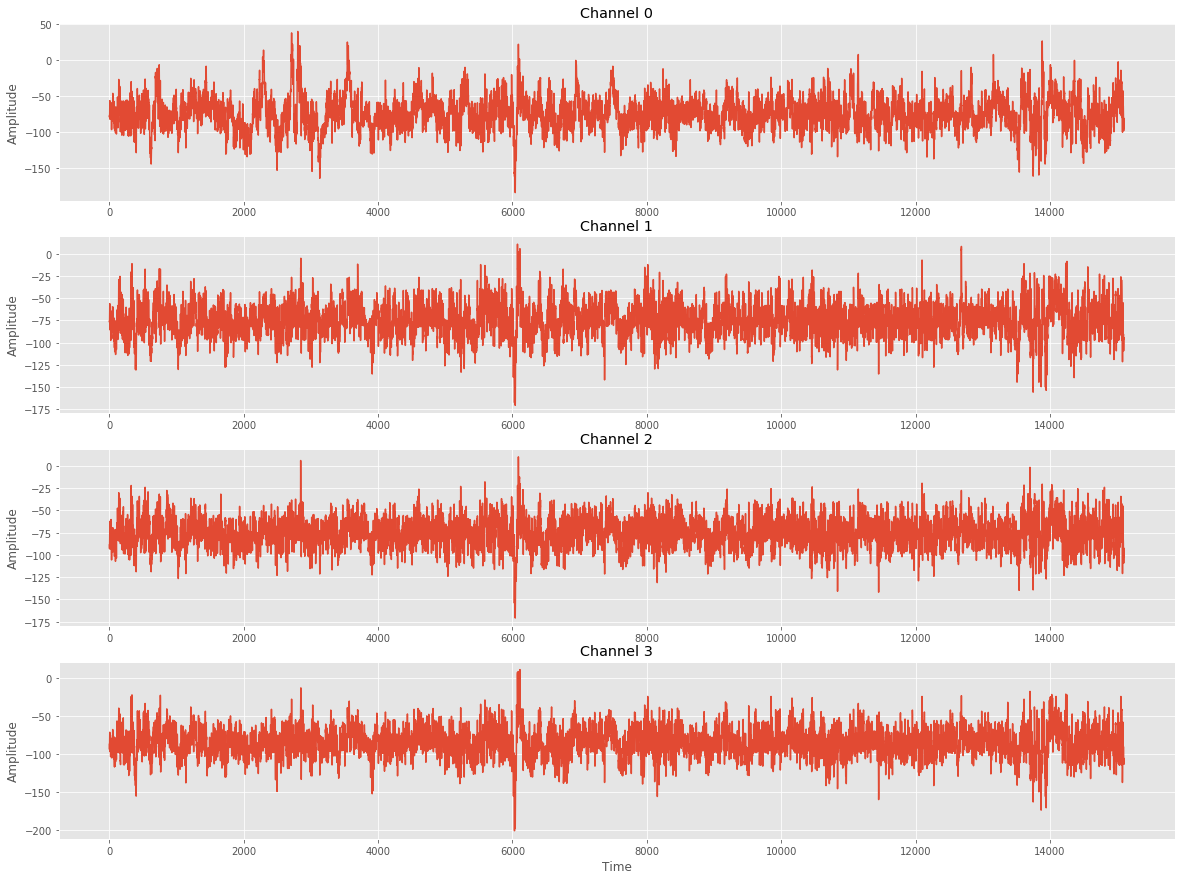

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(20,15))

for i, ax in enumerate(fig.axes):
    ax.plot(df.iloc[:,i])
    ax.set_ylabel("Amplitude")
    
    ax.set_title("Channel {}".format(i))
    
ax.set_xlabel("Time")

plt.show()

# Plot fft

Power spectrum

(63,)


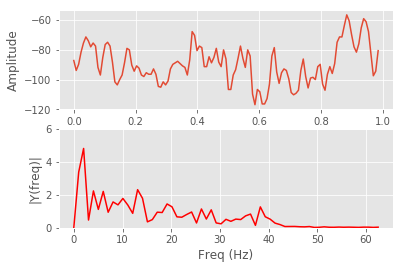

In [10]:
def plot_fft(snippet):
    frq, Y = get_fft(snippet)
    print(Y.shape)
    #Added in: (To remove bias.)
    Y[0] = 0

    fig, ax = plt.subplots(2, 1)
    t = np.arange(0,len(snippet)/SAMPLING_RATE,1/SAMPLING_RATE)
    ax[0].plot(t,snippet)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[1].set_ylim(0, 6)
    ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|');

# Grab 1 second and plot
snippet = df.iloc[:127,i]
plot_fft(snippet)
#plot_url = plt.plot_mpl(fig, filename='mpl-basic-fft')

(500,)


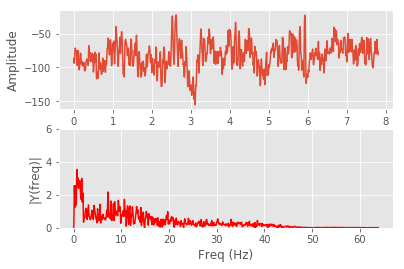

In [11]:
snippet = df.iloc[:1000,i]
plot_fft(snippet)

## Band averages

In [12]:
snippet = df.iloc[:1000,i]
f,Y = get_fft(np.hanning(len(snippet))*snippet)
theta, alpha, beta = theta_alpha_beta_averages(f,Y)
theta, alpha, beta

(0.46429743678021396, 0.6150282939452059, 0.20679436838828047)

# Make image frames

Proyections of the activity to a 2d plot

In [16]:
X = make_frames(df,1)
X.shape

(117, 14, 3)

In [17]:
X_1 = X.reshape(117, X.shape[1]*X.shape[2])
X_1.shape

(117, 42)

In [15]:
locs_2d = [(0.3365922112395738, -1.2361058792074007), (7.604101253680111e-17, -1.2418439763978288), 
           (-0.34374733394096496, -1.0016415369557565), (0.9157742224076064, -0.8516700268390739), 
           (0.22667265410177617, -0.693305669614743), (4.2303075026511913e-17, -0.6908616436341476), 
           (2.5666550686485195e-17, -0.41916658263191064), (-0.2557240551721939, -0.42833779241342484), 
           (-0.534287745073574, -0.4446918001304672), (-0.7936131740399253, -0.4555545752281128), 
           (0.21398122533036998, 0.38447594357747117), (2.272936032830068e-17, 0.3711986238665017), 
           (-0.48863672925399154, 0.7252902040103363), (1,1)]#(-0.6162746958262504, 0.8132625003849987),]


len(locs_2d)

14

In [12]:
locs_2d = [(-2.0,4.0),
           (2.0,4.0),
           (-1.0,3.0),
           (1.0,3.0),
           (-3.0,3.0),
           (3.0,3.0),
           (-2.0,2.0),
           (2.0,2.0),
           (-2.0,-2.0),
           (2.0,-2.0),
           (-4.0,1.0),
           (4.0,1.0),
           (-1.0,-3.0),
           (1.0,-3.0)]

In [18]:
images = gen_images(np.array(locs_2d), X_1, 32, normalize=True)
images.shape

Interpolating 117/117

(117, 3, 32, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


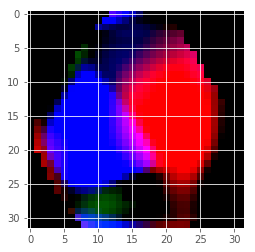

In [19]:
plt.imshow(images[24].T)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


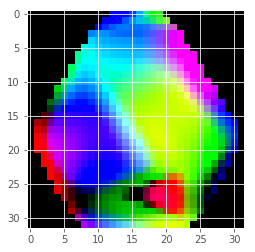

In [20]:
plt.imshow(images[112].T)

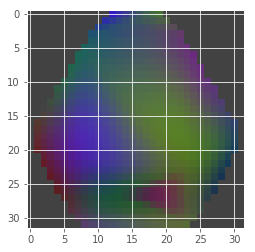

In [21]:
images[images<0].shape
images.shape
images_1 = images + -1*images.min()
images_1 = images_1/images_1.max()
images_1 = (images_1 * 255.0).astype('u1')

plt.imshow(images_1[112].T)

# Make video

In [34]:
import cv2

img1 = images_1[0].T

height , width , layers =  img1.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter('eeg.avi',fourcc,20,(width,height))
for frame in images_1:
    # print(frame)
    video.write(frame.T)

video.release()
cv2.destroyAllWindows()

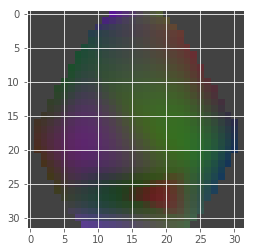

In [23]:
plt.imshow(images_1[0].T)

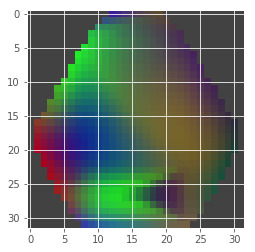

In [24]:
plt.imshow(images_1[1].T)

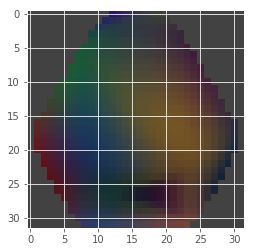

In [25]:
plt.imshow(images_1[2].T)

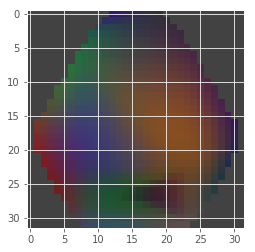

In [26]:
plt.imshow(images_1[3].T)

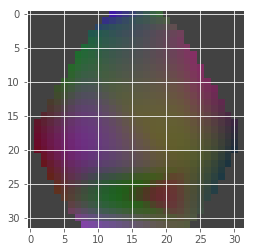

In [27]:
plt.imshow(images_1[4].T)

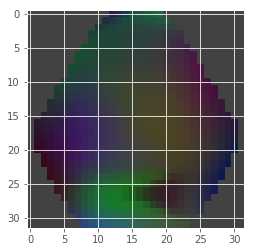

In [28]:
plt.imshow(images_1[5].T)